In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clustering.kmesar import *
from clustering.utils import load_dataset_3_clusters_separate

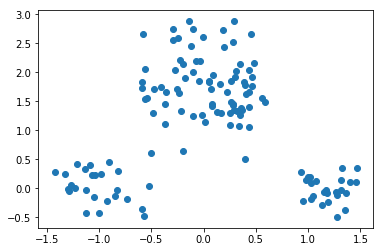

In [2]:
X = load_dataset_3_clusters_separate()
df = pd.DataFrame(X)
plt.scatter(X[:, 0], X[:, 1])

In [3]:
init_centroids = np.array([[-0.6, 0], [-0.2, 3], [0.4, 2]])
est = KMESAR(k_clusters=3,
             n_init=1,
             tol=1e-1,
             init_centroids=init_centroids,
             simulated_annealing_on=False,
             convergence_tracking=True
             )
est.print_details()

--------------- Algorithm details ---------------
    * Type: Standard K-Means
    * Number of clusters (k): 3
    * Centroid initialization method: random (ignored)
    * Initial centroids (specified): True
    * Number of initialization repetition: 1
    * Maximum iterations: 300
    * Convergence tolerance: 0.1
    * Empty clusters resolution method: random
    * Convergence tracking: True
    * ECR tracking: False
    * Tracking scaler: None
-------------------------------------------------


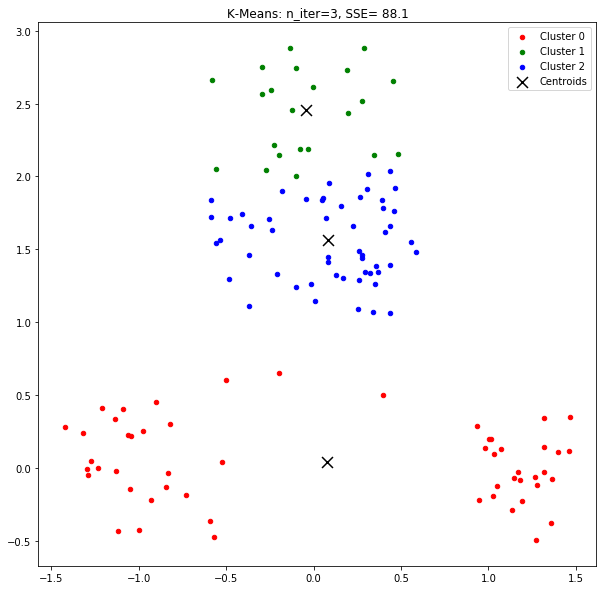

------------- K-Means clustering -------------
    * Iterations before convergence: 3
    * Total empty cluster resolutions: 0
    * Sum of squared error:  88.1
    * Time elapsed: 23ms
 ---------------------------------------------


In [4]:
est.fit(X)
est.plot_clustered_data(X, colors=['red', 'green', 'blue'], s=20)
est.print_clustering_info()

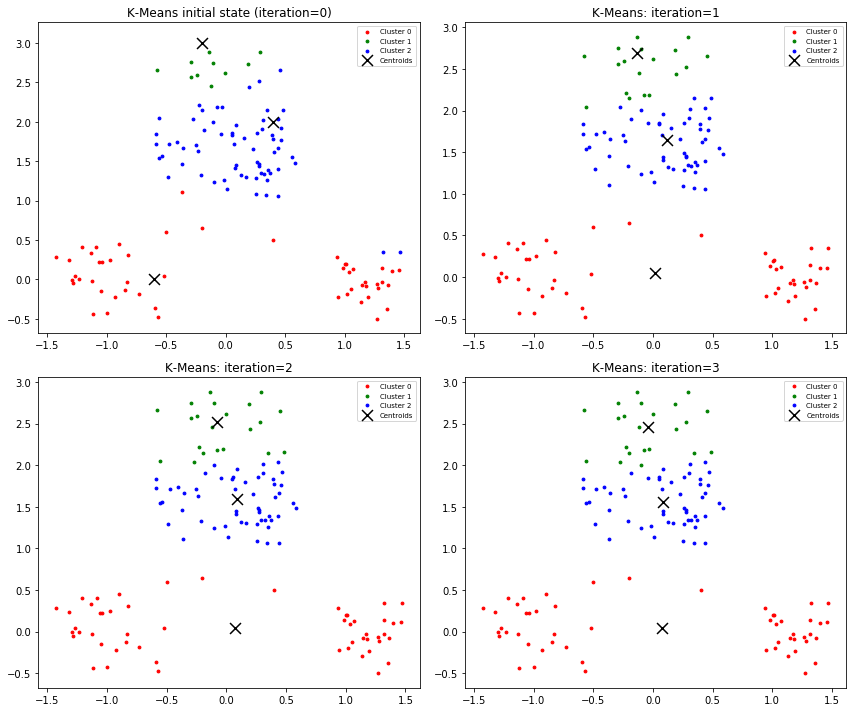

In [5]:
est.plot_tracking_history(X, out_file='K-Means_simple_failure')

In [6]:
# stanje algoritma u prvoj iteraciji
centroid_to_be_annealed = est.tracking_history_[0]['centroids'][1][0]
other_centroids = est.tracking_history_[0]['centroids'][1][1:]
labels = est.tracking_history_[0]['labels'][1]
label_j = 0
k_clusters = 3

print(f'Annealing centroid at position: {centroid_to_be_annealed}')

Annealing centroid at position: [0.01706991 0.04946833]


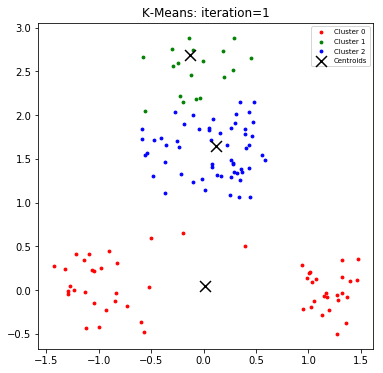

In [7]:
est.plot_iteration(X, it=1)

"Random annealing"

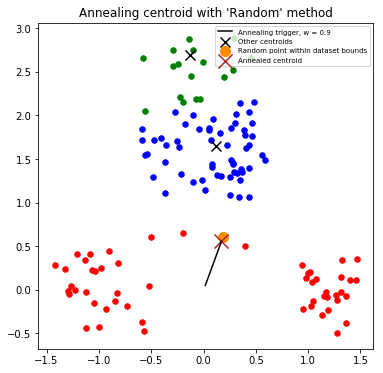

In [9]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       centroid_to_be_annealed,
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='random',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label='Random point within dataset bounds')
ax.scatter(annealed_centroid[0], annealed_centroid[1], c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Random\' method')

fig.savefig('Random annealing')

"Max" annealing

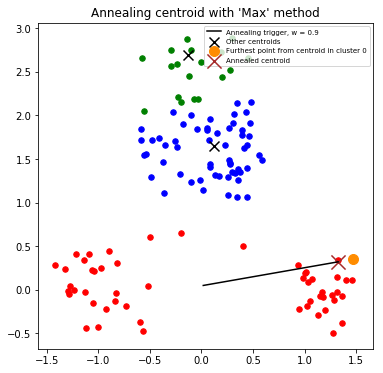

In [10]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       centroid_to_be_annealed,
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='max',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label=f'Furthest point from centroid in cluster {label_j}')
ax.scatter(annealed_centroid[0], annealed_centroid[1], c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Max\' method')

fig.savefig('Max annealing')


"Min" annealing

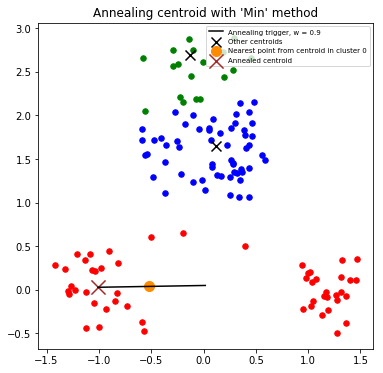

In [11]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       centroid_to_be_annealed,
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='min',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label=f'Nearest point from centroid in cluster {label_j}')
ax.scatter(annealed_centroid[0], annealed_centroid[1],
           c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Min\' method')

fig.savefig('Min annealing')

"Cluster-own" annealing

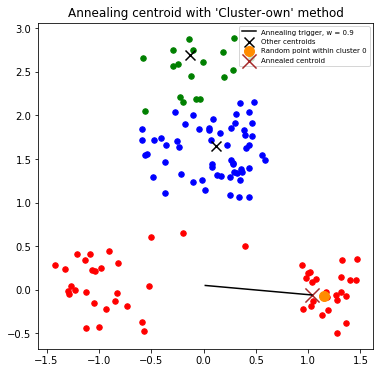

In [12]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       centroid_to_be_annealed,
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='cluster_own',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label=f'Random point within cluster {label_j}')
ax.scatter(annealed_centroid[0], annealed_centroid[1],
           c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Cluster-own\' method')

fig.savefig('Cluster-own annealing')

"Cluster-other" annealing

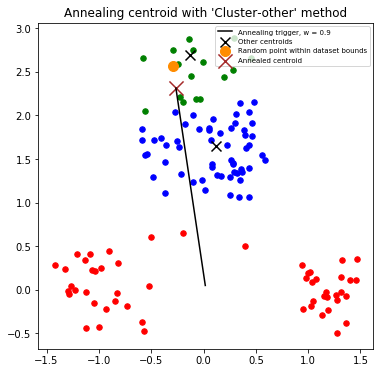

In [24]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       centroid_to_be_annealed,
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='cluster_other',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label='Random point within dataset bounds')
ax.scatter(annealed_centroid[0], annealed_centroid[1],
           c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Cluster-other\' method')

fig.savefig('Cluster-other annealing')

"Cluster-mean" annealing

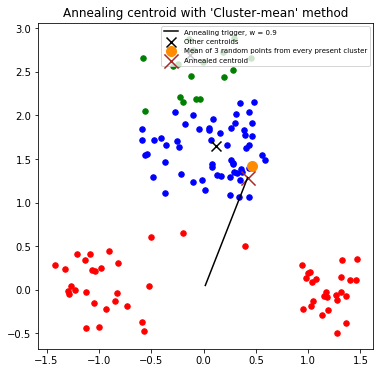

In [18]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       centroid_to_be_annealed,
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='cluster_mean',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label='Mean of 3 random points from every present cluster')
ax.scatter(annealed_centroid[0], annealed_centroid[1],
           c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Cluster-mean\' method')

fig.savefig('Cluster-mean annealing')

"Centroid-split" annealing

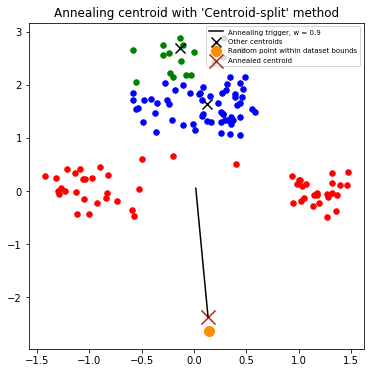

In [25]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       est.tracking_history_[0]['centroids'][1],
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='centroid_split',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label='Random point within dataset bounds')
ax.scatter(annealed_centroid[0], annealed_centroid[1],
           c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Centroid-split\' method')

fig.savefig('Centroid-split annealing')

"Centroid-gather" annealing

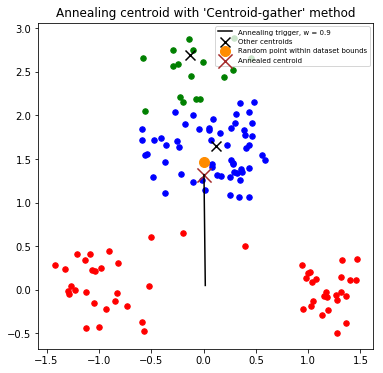

In [26]:
annealing_vector, direction_point, weight = calculate_annealing_vector(X,
                                                                       labels,
                                                                       est.tracking_history_[0]['centroids'][1],
                                                                       label_j,
                                                                       1,
                                                                       annealing_method='centroid_gather',
                                                                       annealing_weight_function='fixed',
                                                                       beta=0.9
                                                                       )
annealed_centroid = centroid_to_be_annealed + annealing_vector

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

colors = ['red', 'green', 'blue']
for cluster_label in range(k_clusters):
    cluster_subsample = X[np.where(labels == cluster_label)]
    ax.scatter(cluster_subsample[:, 0], cluster_subsample[:, 1],
                c=colors[cluster_label], s=30, label='_nolegend_')

ax.scatter(other_centroids[:, 0], other_centroids[:, 1],
            c='black', s=100, marker='x', label='Other centroids')
ax.scatter(direction_point[0], direction_point[1], c='darkorange', s=100,
            label='Random point within dataset bounds')
ax.scatter(annealed_centroid[0], annealed_centroid[1],
           c='brown', s=200, marker='x', label='Annealed centroid')

ax.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black', label=f'Annealing trigger, w = {weight}')

ax.legend(loc='upper right', prop={'size': 7})
ax.set_title('Annealing centroid with \'Centroid-gather\' method')

fig.savefig('Centroid-gather annealing')